In [220]:
import pickle
import glob
import os
import sys
import time
import numpy as np
import pandas as pd 
import multiprocessing as mp 
import openmdao.api as om
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter




In [221]:
# This function loads the openmdao sql file and does most of the work here
def load_OMsql(log, rec_data=None):
    print(f'Loading: {log}')
    cr = om.CaseReader(log)
    
    if rec_data is None:
        rec_data = {}

    cases = cr.get_cases('driver')
    for case in cases:
        for key in case.outputs.keys():
            if key not in rec_data:
                rec_data[key] = []
            rec_data[key].append(case[key])

    return rec_data

print(os.getcwd())
data1 = load_OMsql(r'output/log_iea22mw_umaine.sql')

data2 = load_OMsql(r'log_iea22mw_umaine.sql')
data2 = load_OMsql(r'output2/log_iea22mw_umaine2.sql', rec_data=data2)
# data3 = load_OMsql(r'BEM_PreComp_DEL_v3/log_iea22mw_umaine.sql')
# data4 = load_OMsql(r'BEM_PreComp_DEL_v4/log_iea22mw_umaine.sql')


/home/robert/GitHub/QBtoWEIS/qb_examples/start_from_sql
Loading: output/log_iea22mw_umaine.sql
Loading: log_iea22mw_umaine.sql
Loading: output2/log_iea22mw_umaine2.sql


In [222]:
# Search for keys in rec_data, it has every openmdao input/output from every iteration, so it's large
for key in data1:
    print(key)
print('----------------------------------')
for key in data2:
    print(key)

aeroelastic_qblade.DEL_RootMyb
aeroelastic_qblade.DEL_TwrBsMyt
aeroelastic_qblade.Max_PtfmPitch
aeroelastic_qblade.avg_pitch_travel
aeroelastic_qblade.max_nac_accel
aeroelastic_qblade.qblade_failed
aeroelastic_qblade.rotor_overspeed
sse_tune.tune_rosco.PC_Ki
sse_tune.tune_rosco.PC_Kp
tune_rosco_ivc.Kp_float
tune_rosco_ivc.omega_pc
tune_rosco_ivc.ptfm_freq
tune_rosco_ivc.zeta_pc
floatingse.constr_draft_heel_margin
floatingse.constr_fairlead_wave
floatingse.constr_fixed_margin
floatingse.constr_freeboard_heel_margin
floatingse.heave_period
floatingse.pitch_period
floatingse.constr_variable_margin
floatingse.platform_mass
floatingse.system_structural_mass
floating.jointdv_0
floating.jointdv_1
floating.memgrp1.outer_diameter_in
----------------------------------
aeroelastic_qblade.DEL_RootMyb
aeroelastic_qblade.DEL_TwrBsMyt
aeroelastic_qblade.Max_PtfmPitch
aeroelastic_qblade.avg_pitch_travel
aeroelastic_qblade.max_nac_accel
aeroelastic_qblade.qblade_failed
aeroelastic_qblade.rotor_overspee

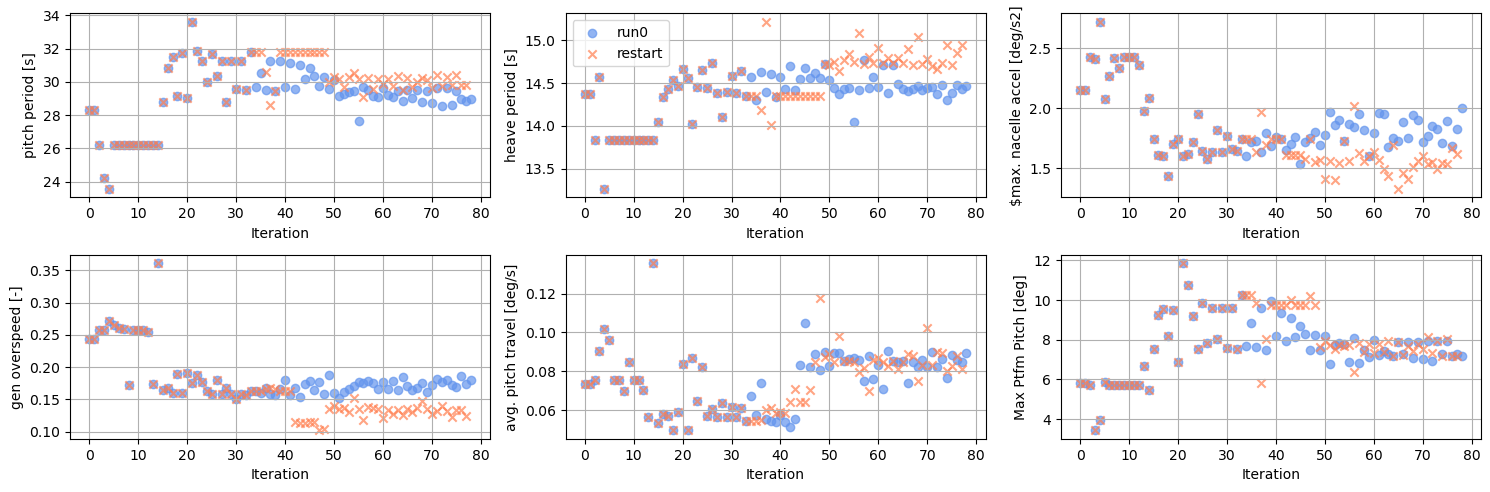

In [223]:
## CONSTRAINTS

# Plot design variables, constraints, and merit figures (openmdao inputs/outputs) vs. iteration
y_vars = [ # channel key corresponding y_label
        # ['floatingse.constr_draft_heel_margin', 'survival heel margin [-]'],
        ['floatingse.pitch_period', 'pitch period [s]'],
        ['floatingse.heave_period', 'heave period [s]'],
        # ['floatingse.constr_fixed_margin', 'fixed_ballast_capacity []'],
        # ['floatingse.constr_variable_margin', 'variable_ballast_capacity []'],
        # ['floatingse.constr_freeboard_heel_margin', 'freeboard_margin [-]'],
        # ['floatingse.constr_draft_heel_margin', 'draft_margin [-]'],
        # ['floatingse.constr_fairlead_wave', 'fairlead_depth [m]'],
        ['aeroelastic_qblade.max_nac_accel', '$max. nacelle accel [deg/s2]'],
        ['aeroelastic_qblade.rotor_overspeed', 'gen overspeed [-]'],
        ['aeroelastic_qblade.avg_pitch_travel', 'avg. pitch travel [deg/s]'], 
        # ['aeroelastic_qblade.Std_PtfmPitch', 'Std Ptfm Pitch [deg]'],
        ['aeroelastic_qblade.Max_PtfmPitch', 'Max Ptfm Pitch [deg]'],        
        # ['aeroelastic_qblade.max_pitch_rate_sim', '$max. pitch rate [deg/s]'],
        # ['aeroelastic_qblade.Mean_PtfmPitch', 'Mean Ptfm Pitch [deg]'],

]

dv_column = 1 # Column index

n_plots = len(y_vars)
n_cols = 3  # Fixed number of columns
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate rows needed

# Create the grid of subplots
fig, axs = plt.subplots(n_rows, n_cols)

axs = axs.flatten()

sp_size = 2
fig.set_size_inches(n_cols * 5, n_rows * 2.5)
# colors = ['darkblue', 'orange', 'slateblue', 'tomato']  # PC and S color

colors = ['cornflowerblue', 'coral', 'red', 'coral']  # Define your color palette
labels = ['run0', 'restart', 'BEM PC v3']  # Labels for each data series
# linestyles = ['-', '--', '-', '--']  # Line styles for the corresponding series
markers = ['o', 'x', 'o', 'x']  # Markers: 'o' for PC, 'x' for S

i_ax = 0
for yv in y_vars:
    try:
        # Plot data with scatter, applying color, label, and marker accordingly
        for idx, (data, label, color, marker) in enumerate(zip([data1, data2], labels, colors, markers)):
            y_data = np.squeeze(data[yv[0]][:])  # Extract data for current variable
            if y_data.ndim > 1 and y_data.shape[1] > 1:
                y_data = y_data[:, dv_column]  # Select the correct column if data is multidimensional
            
            
            
            # Plot scatter with corresponding color, label, and marker
            # Normalize by initial value
            # if yv == y_vars[-1]:
            #     y0 = y_data[0] if len(y_data) > 0 else 1  # Avoid division by zero
            #     y_data_rel = y_data / y0  
            #     axs[i_ax].scatter(np.arange(len(y_data_rel)), y_data_rel, label=label, color=color, alpha=0.7, marker=marker)
            # else:
            axs[i_ax].scatter(np.arange(len(y_data[:])), y_data[:], label=label, color=color, alpha=0.7, marker=marker)
        # Set labels and grid
        axs[i_ax].set_xlabel('Iteration')
        axs[i_ax].set_ylabel(f"{yv[1]}")
        axs[i_ax].grid()

        # Display the legend
        if i_ax == 1:
            axs[i_ax].legend(loc='best')
            # axs[i_ax].legend(loc='upper left', bbox_to_anchor=(1, 0.5))

        # Increment to the next axis for the next y-variable
        i_ax += 1

    except Exception as e:
        print(f"Error processing {yv[0]}: {e}")

# Remove any unused subplots
for i in range(i_ax, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
fig.tight_layout(pad=1)
plt.show()

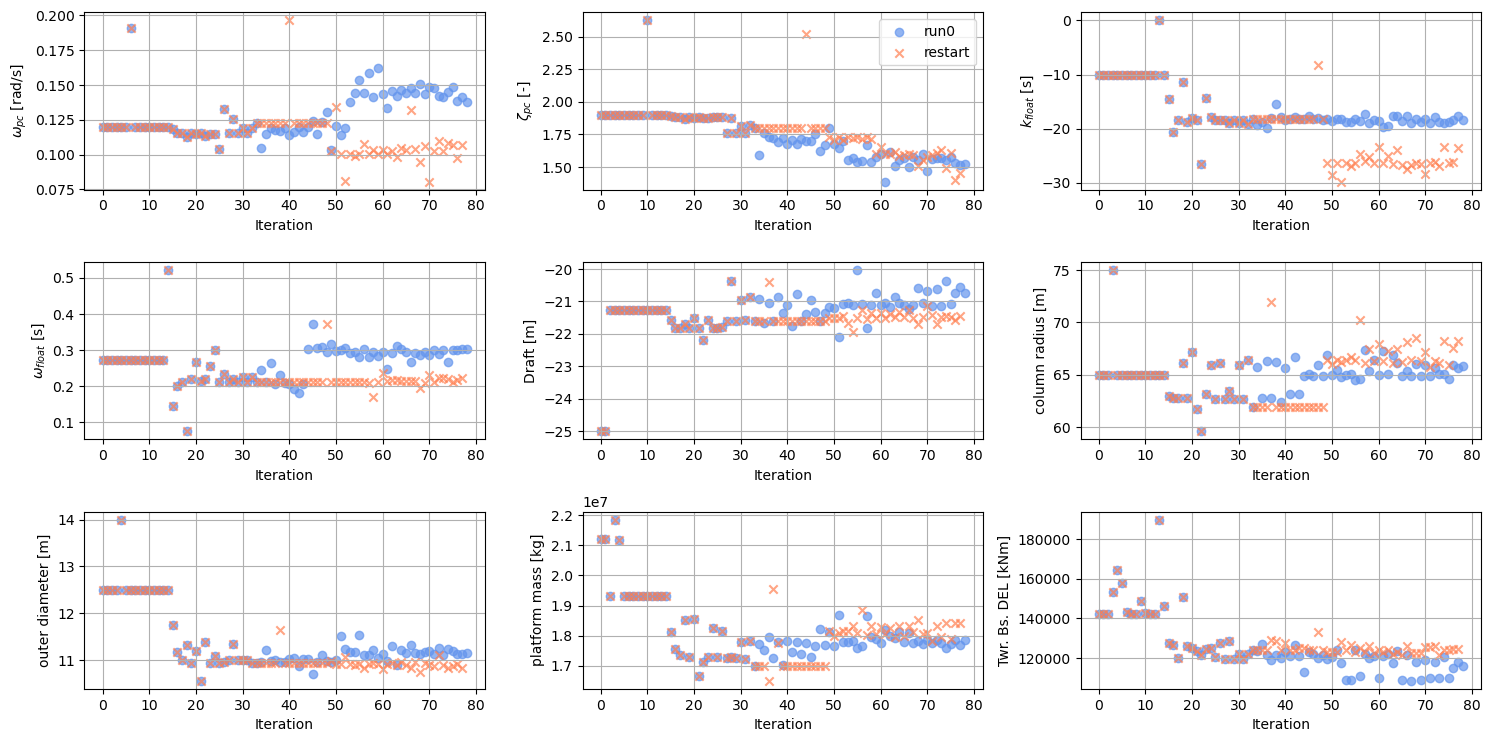

In [224]:
# Plot design variables, constraints, and merit figures (openmdao inputs/outputs) vs. iteration
y_vars = [ # channel key corresponding y_label
        ['tune_rosco_ivc.omega_pc', '$\\omega_{pc}$ [rad/s]'],
        ['tune_rosco_ivc.zeta_pc', '$\\zeta_{pc}$ [-]'],
        ['tune_rosco_ivc.Kp_float', '$k_{float}$ [s]'],
        ['tune_rosco_ivc.ptfm_freq', '$\\omega_{float}$ [s]'],
        ['floating.jointdv_0', 'Draft [m]'],
        ['floating.jointdv_1', 'column radius [m]'],
        ['floating.memgrp1.outer_diameter_in', 'outer diameter [m]'],
        ['floatingse.platform_mass', 'platform mass [kg]'],
        ['aeroelastic_qblade.DEL_TwrBsMyt', 'Twr. Bs. DEL [kNm]'],
        # ['financese_post.lcoe', 'LCOE [$/MWh]'],
]

dv_column = 1 # Column index

n_plots = len(y_vars)
n_cols = 3  # Fixed number of columns
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate rows needed

# Create the grid of subplots
fig, axs = plt.subplots(n_rows, n_cols)

axs = axs.flatten()

sp_size = 2
fig.set_size_inches(n_cols * 5, n_rows * 2.5)
# colors = ['darkblue', 'orange', 'slateblue', 'tomato']  # PC and S color

colors = ['cornflowerblue', 'coral', 'red', 'coral']  # Define your color palette
labels = ['run0', 'restart','BEM PC v3']  # Labels for each data series
# linestyles = ['-', '--', '-', '--']  # Line styles for the corresponding series
markers = ['o', 'x', 'o', 'x']  # Markers: 'o' for PC, 'x' for S

i_ax = 0
for yv in y_vars:
    try:
        # Plot data with scatter, applying color, label, and marker accordingly
        for idx, (data, label, color, marker) in enumerate(zip([data1, data2], labels, colors, markers)):
            y_data = np.squeeze(data[yv[0]][:])  # Extract data for current variable
            if y_data.ndim > 1 and y_data.shape[1] > 1:
                y_data = y_data[:, dv_column]  # Select the correct column if data is multidimensional
            
            
            
            # Plot scatter with corresponding color, label, and marker
            # Normalize by initial value
            # if yv == y_vars[-1]:
            #     y0 = y_data[0] if len(y_data) > 0 else 1  # Avoid division by zero
            #     y_data_rel = y_data / y0  
            #     axs[i_ax].scatter(np.arange(len(y_data_rel)), y_data_rel, label=label, color=color, alpha=0.7, marker=marker)
            # else:
            axs[i_ax].scatter(np.arange(len(y_data[:])), y_data[:], label=label, color=color, alpha=0.7, marker=marker)
        # Set labels and grid
        axs[i_ax].set_xlabel('Iteration')
        axs[i_ax].set_ylabel(f"{yv[1]}")
        axs[i_ax].grid()

        # Display the legend
        if i_ax == 1:
            axs[i_ax].legend(loc='best')
            # axs[i_ax].legend(loc='upper left', bbox_to_anchor=(1, 0.5))

        # Increment to the next axis for the next y-variable
        i_ax += 1

    except Exception as e:
        print(f"Error processing {yv[0]}: {e}")

# Remove any unused subplots
for i in range(i_ax, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
fig.tight_layout(pad=1)
plt.show()
